##  Homework 6 - Problem 3 : Multiple trees on MNIST

### Student: Dimitrios Tanoglidis

In [13]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

### Import the MNIST dataset

In [2]:
data_train = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/train_images.npy"))
data_test = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/test_images.npy"))
labels_train = np.float32(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/train_labels.npy"))
labels_test = np.float32(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/test_labels.npy"))


# Combine all them into one dataset - divide the data by 255 to normalize the values
data = np.concatenate((data_train, data_test))/255.
labels = np.concatenate((labels_train, labels_test))

# Print their shapes to see
print(np.shape(data));print(np.shape(labels))
# Print also min and max values
print(np.min(data),np.max(data))

(70000, 784)
(70000, 1)
(0.0, 1.0)


Split in training, validation and test sets

In [3]:
from sklearn.model_selection import train_test_split

# Split into 60% train set and 40% "rest" set - we will use it to further sub-split
data_train, data_rest, labels_train, labels_rest = train_test_split(data, labels, train_size = 5.0/7.0, random_state=42)

# Further split the rest set into validation and test sets
data_valid, data_test, labels_valid, labels_test = train_test_split(data_rest, labels_rest, train_size = 0.50, random_state=42)

# Print their sizes:
print(np.shape(data_train),np.shape(data_valid), np.shape(data_test))

//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((50000, 784), (10000, 784), (10000, 784))


Actually, because it takes too much time with 5000 training set, i will keep just the first 10000

In [4]:
data_tr = data_train[:10000]
labels_tr = labels_train[:10000]

print(np.shape(data_tr))

(10000, 784)


#### Import Random Forest and AdaBoost classifiers

In [5]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

I will expepriment with different stopping rules, namely min_sample_split and max_features and plot the error rate as a function of the number of trees.

Error rate = 1 - accuracy

Define a function that rerurns arrays with the error rate of the training and validation sets.
Inputs are the samp_split (the minimum number of samples in node to allow it to split), the max_frat (number of random features) and an array of number of trees, called "trees".

### a) Random Forest

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
def stopping_rules_res(samp_split, max_feat, trees):
    
    error_training = np.zeros(len(trees))
    error_validation = np.zeros(len(trees))
    
    for i in range(len(trees)):
        n_trees = trees[i]
        
        clf = RandomForestClassifier(n_estimators = n_trees, min_samples_split = samp_split,
                                    criterion="entropy", max_features=max_feat)
        
        clf.fit(data_tr, np.ravel(labels_tr))
        
        y_pred_train = clf.predict(data_tr)
        y_pred_valid = clf.predict(data_valid)
        
        error_training[i] = 1.0 - accuracy_score(np.ravel(labels_tr), y_pred_train)
        error_validation[i] = 1.0 - accuracy_score(np.ravel(labels_valid), y_pred_valid)
        
    return error_training, error_validation

#### Trees: 1 to 100, in steps of five

In [8]:
trees = np.arange(5,105,5)
one = np.array([1])
trees = np.concatenate((one, trees))

To get a sense of what kind of values min_samples_split and max_features can take, we note that the default for min_samples_split = 2 and that we have 784 features per image. 

- Let's start then with the "default" case, min_samples_split = 2, max_features = $\sqrt{784}$ = 28

In [9]:
err_train_def, err_valid_def = stopping_rules_res(2, 28, trees)

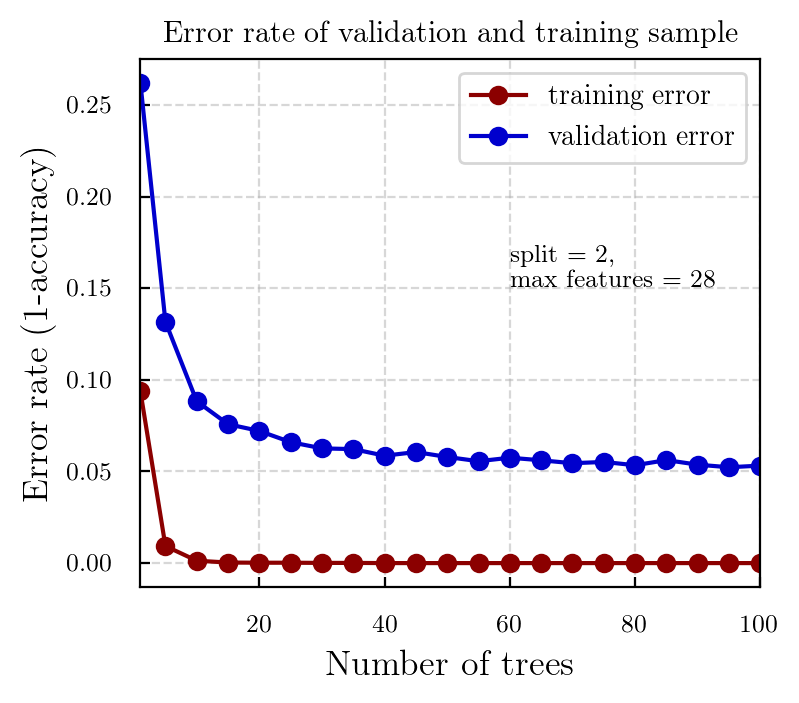

In [19]:
plt.figure(figsize=(4, 3.5))

plt.plot(trees, err_train_def, c = 'darkred', marker='o',label='training error')
plt.plot(trees, err_valid_def , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Number of trees', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,100)

plt.text(60, 0.15, 'split = 2,\n max features = 28')

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

We see that after 60 results do not change much, so I will use these as maximum number of trees from now on

In [20]:
trees = np.arange(5,65,5)
one = np.array([1])
trees = np.concatenate((one, trees))

- min_samples_split = 8, max_featues = 28

In [27]:
err_train, err_valid = stopping_rules_res(8, 28, trees)

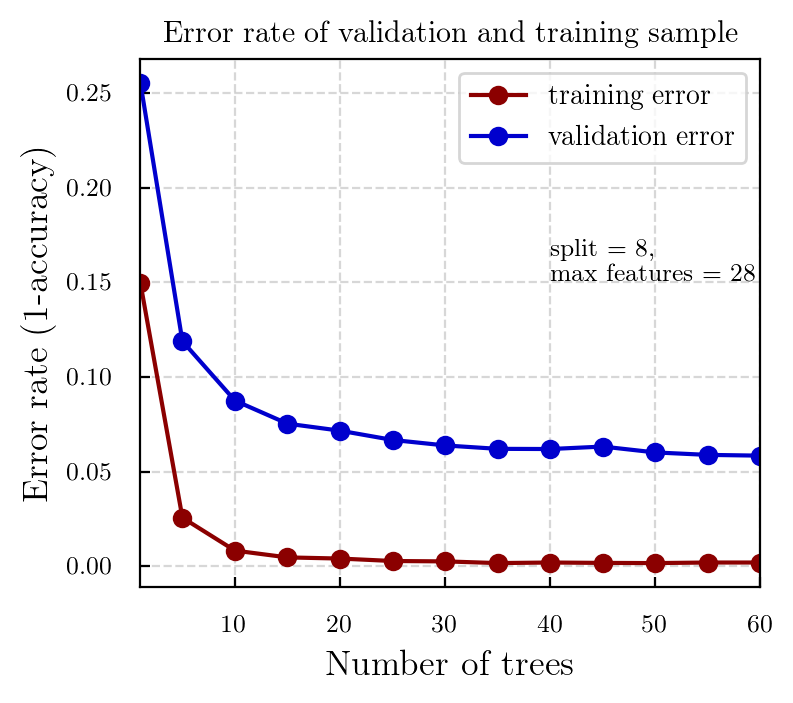

In [28]:
plt.figure(figsize=(4, 3.5))

plt.plot(trees, err_train, c = 'darkred', marker='o',label='training error')
plt.plot(trees, err_valid , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Number of trees', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,60)

plt.text(40, 0.15, 'split = 8,\n max features = 28')

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

Results not much different, but slightly worse

- min_samples_split = 16, max_features = 28

In [29]:
err_train, err_valid = stopping_rules_res(16, 28, trees)

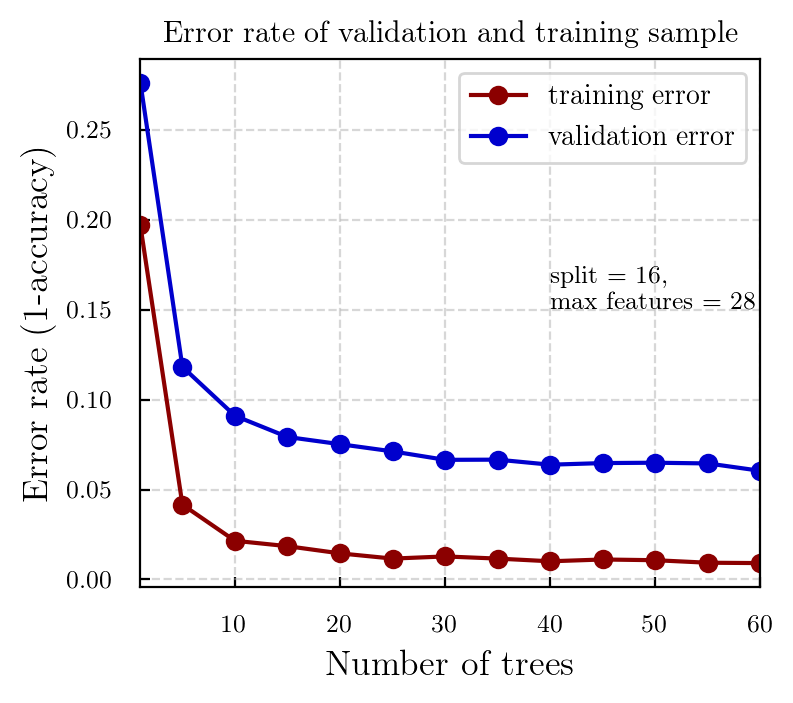

In [30]:
plt.figure(figsize=(4, 3.5))

plt.plot(trees, err_train, c = 'darkred', marker='o',label='training error')
plt.plot(trees, err_valid , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Number of trees', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,60)

plt.text(40, 0.15, 'split = 16,\n max features = 28')

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

This gives worse results. Let's keep n_split = 2 and use max_features =  16

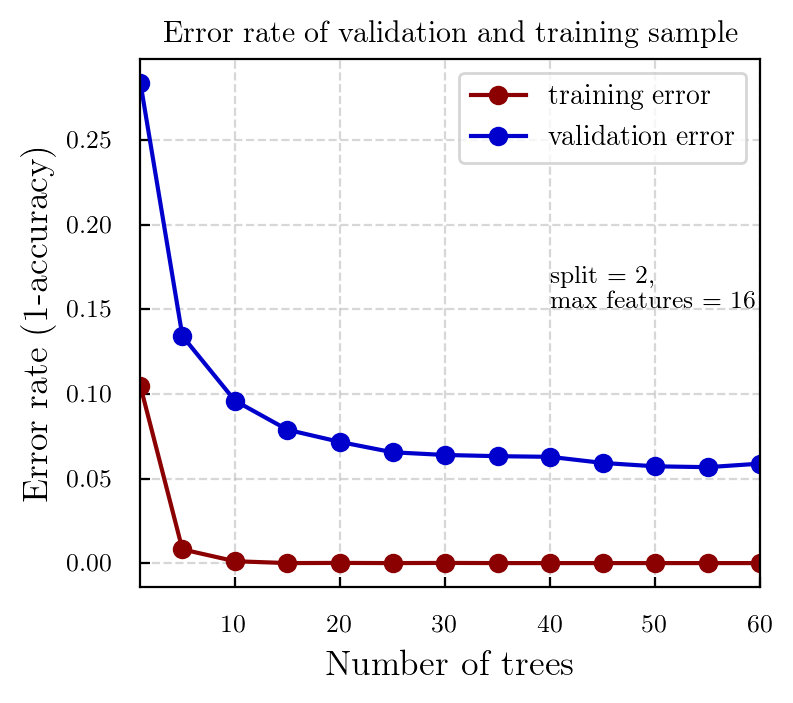

In [31]:
err_train, err_valid = stopping_rules_res(2, 16, trees)

plt.figure(figsize=(4, 3.5))

plt.plot(trees, err_train, c = 'darkred', marker='o',label='training error')
plt.plot(trees, err_valid , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Number of trees', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,60)

plt.text(40, 0.15, 'split = 2,\n max features = 16')

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

- Let's now use n_split = 2, max_features  = 28*2 = 56

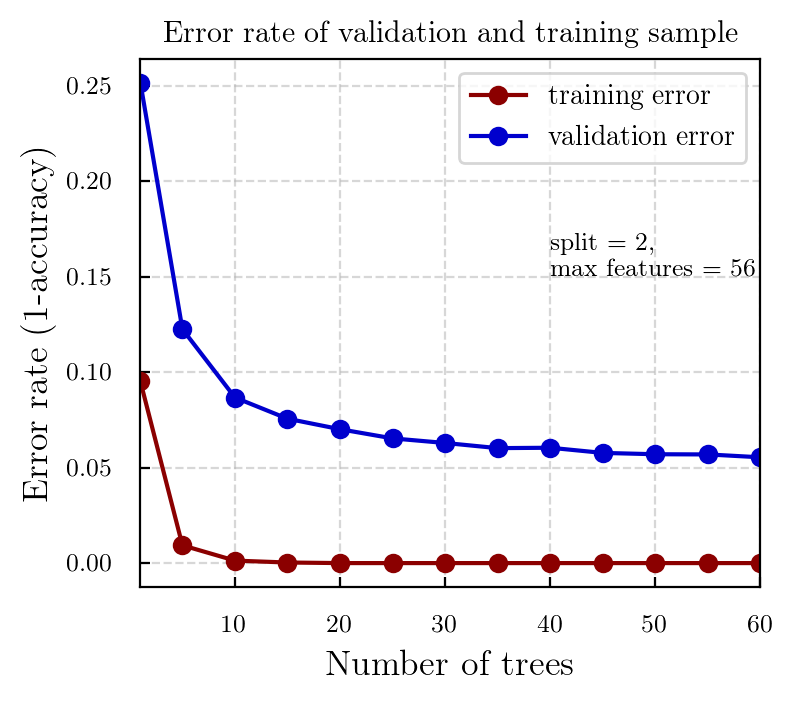

In [32]:
err_train, err_valid = stopping_rules_res(2, 56, trees)

plt.figure(figsize=(4, 3.5))

plt.plot(trees, err_train, c = 'darkred', marker='o',label='training error')
plt.plot(trees, err_valid , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Number of trees', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,60)

plt.text(40, 0.15, 'split = 2,\n max features = 56')

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

It seems that the best configuration is for n_split = 2, max_features = 56.
Let's check in on the test set. Also let's use the full training set.

In [38]:
error_training = np.zeros(len(trees))
error_test = np.zeros(len(trees))
    
for i in range(len(trees)):
    n_trees = trees[i]
        
    clf = RandomForestClassifier(n_estimators = n_trees, min_samples_split = 2,
                                    criterion="entropy", max_features=56)
        
    clf.fit(data_train, np.ravel(labels_train))
        
    y_pred_train = clf.predict(data_train)
    y_pred_test = clf.predict(data_test)
        
    error_training[i] = 1.0 - accuracy_score(np.ravel(labels_train), y_pred_train)
    error_test[i] = 1.0 - accuracy_score(np.ravel(labels_test), y_pred_test)

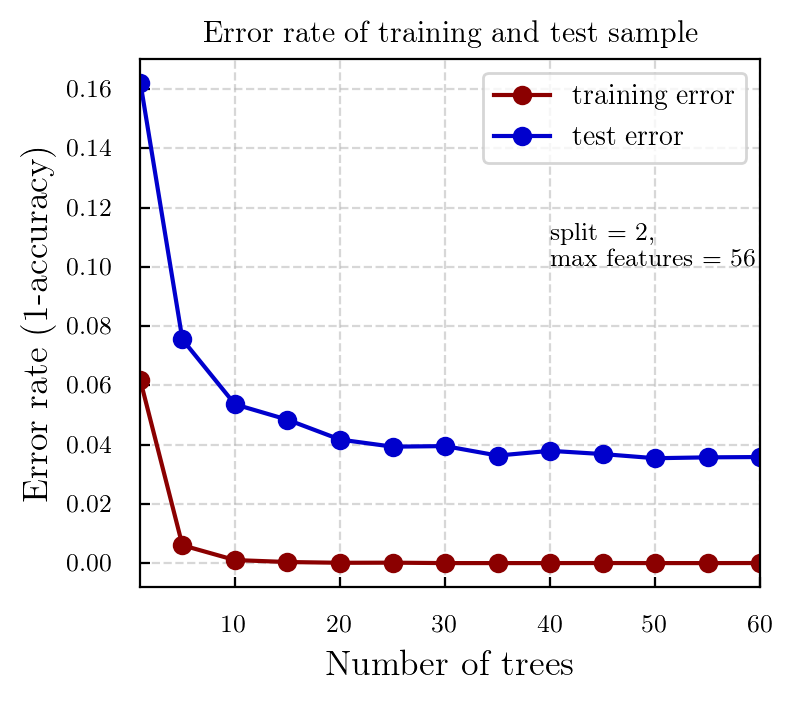

In [42]:
plt.figure(figsize=(4, 3.5))

plt.plot(trees, error_training, c = 'darkred', marker='o',label='training error')
plt.plot(trees, error_test , c = 'mediumblue', marker='o', label='test error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Number of trees', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of training and test sample')
plt.xlim(1,60)

plt.text(40, 0.10, 'split = 2,\n max features = 56')

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

In [43]:
print(error_test[-1])

0.035800000000000054


So, the minimum error rate (using 60 trees) achieved on the testing set is $\sim 3.6 \%$.

### b) AdaBoost

As in a) I will define a function that gets as inputs the samp_split (the minimum number of samples in node to allow it to split), the max_frat (number of random features) and an array of estimators, called "estims".

In [44]:
def Ada_params(samp_split, max_feat, estims):
    
    error_training = np.zeros(len(estims))
    error_validation = np.zeros(len(estims))
    
    for i in range(len(estims)):
        n_estims = estims[i]
        
        clfb = RandomForestClassifier(n_estimators = 1, min_samples_split = samp_split,
                                    criterion="entropy", max_features=max_feat)
        
        ada_cl = AdaBoostClassifier(clfb, n_estimators=n_estims, algorithm='SAMME')
        
        ada_cl.fit(data_tr, np.ravel(labels_tr))
        
        y_pred_train = ada_cl.predict(data_tr)
        y_pred_valid = ada_cl.predict(data_valid)
        
        error_training[i] = 1.0 - accuracy_score(np.ravel(labels_tr), y_pred_train)
        error_validation[i] = 1.0 - accuracy_score(np.ravel(labels_valid), y_pred_valid)
        
    return error_training, error_validation

In [53]:
estims = np.arange(5,105,5)
one = np.array([1])
estims = np.concatenate((one, estims))

-  Let's start again with the "default" case, min_samples_split = 2, max_features = $\sqrt{784}$ = 28

In [54]:
err_train_def, err_valid_def = Ada_params(2, 28, estims)

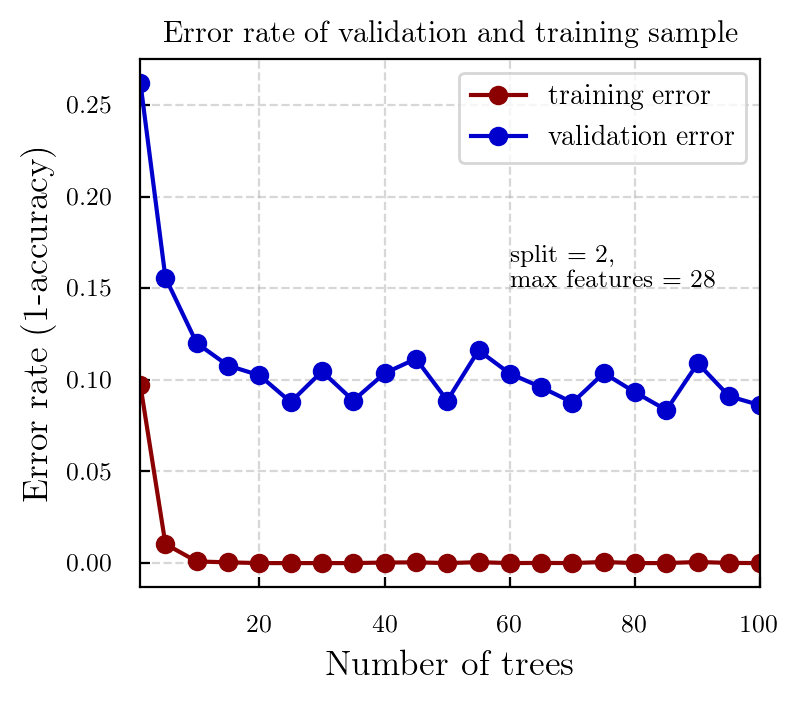

In [58]:
plt.figure(figsize=(4, 3.5))

plt.plot(estims, err_train_def, c = 'darkred', marker='o',label='training error')
plt.plot(estims, err_valid_def , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Number of trees', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,100)

plt.text(60, 0.15, 'split = 2,\n max features = 28')

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

- min_samples_split = 2, max_features = 56

In [56]:
err_train, err_valid = Ada_params(2, 56, estims)

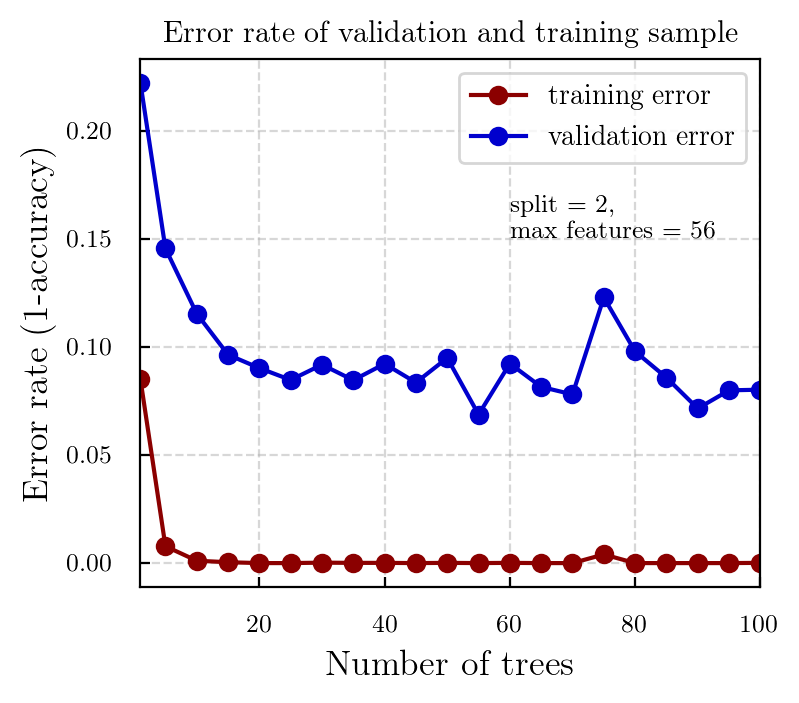

In [60]:
plt.figure(figsize=(4, 3.5))

plt.plot(estims, err_train, c = 'darkred', marker='o',label='training error')
plt.plot(estims, err_valid , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Number of trees', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,100)

plt.text(60, 0.15, 'split = 2,\n max features = 56')

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

In [61]:
err_train, err_valid = Ada_params(8, 28, estims)

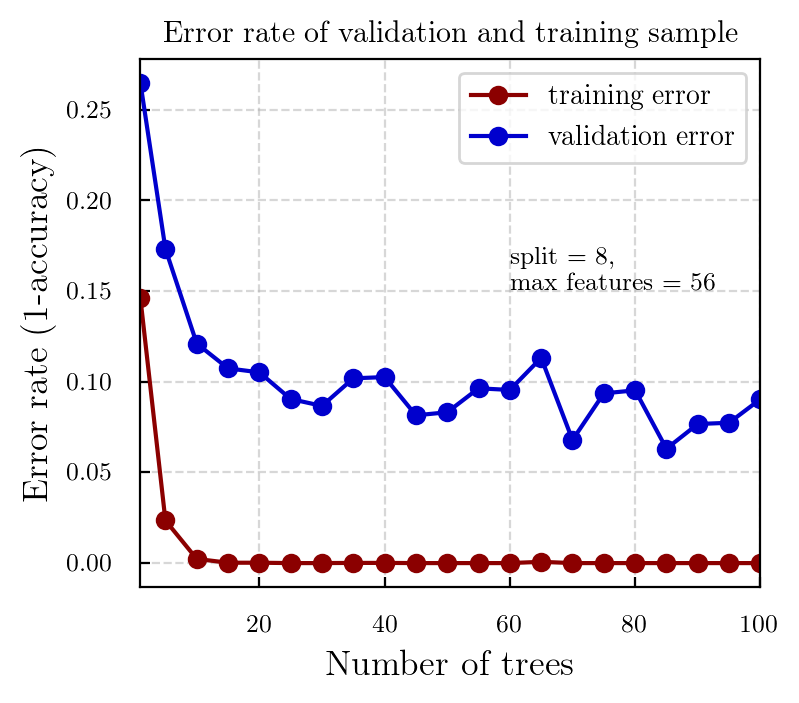

In [62]:
plt.figure(figsize=(4, 3.5))

plt.plot(estims, err_train, c = 'darkred', marker='o',label='training error')
plt.plot(estims, err_valid , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Number of trees', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,100)

plt.text(60, 0.15, 'split = 8,\n max features = 56')

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

In [63]:
err_train, err_valid = Ada_params(16, 28, estims)

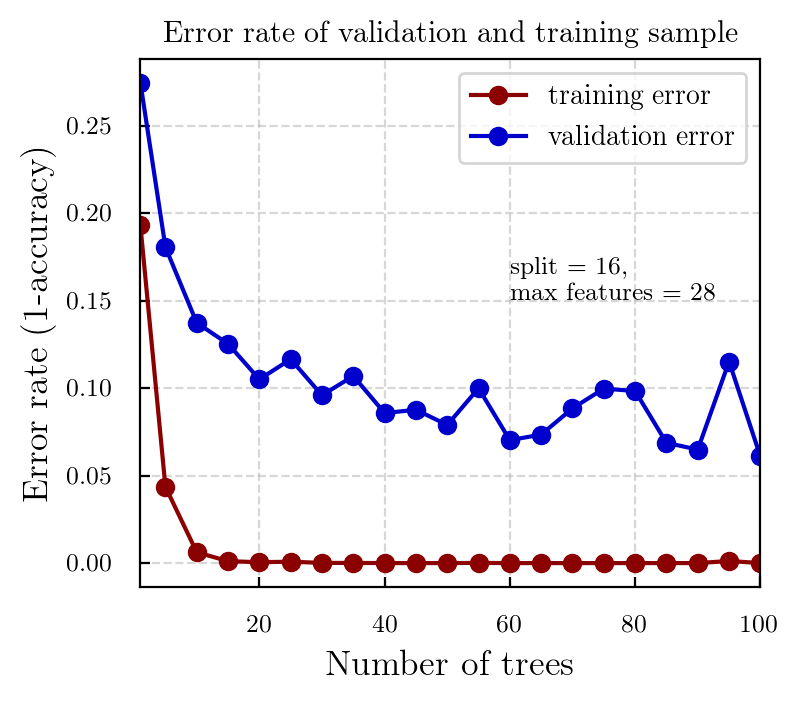

In [64]:
plt.figure(figsize=(4, 3.5))

plt.plot(estims, err_train, c = 'darkred', marker='o',label='training error')
plt.plot(estims, err_valid , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Number of trees', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,100)

plt.text(60, 0.15, 'split = 16,\n max features = 28')

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

In [65]:
err_train, err_valid = Ada_params(32, 28, estims)

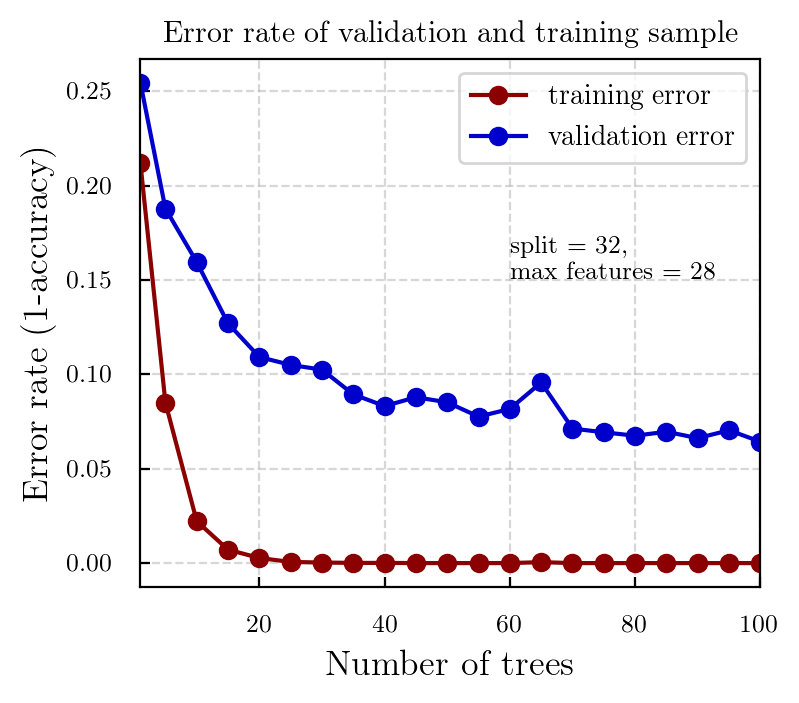

In [66]:
plt.figure(figsize=(4, 3.5))

plt.plot(estims, err_train, c = 'darkred', marker='o',label='training error')
plt.plot(estims, err_valid , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Number of trees', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,100)

plt.text(60, 0.15, 'split = 32,\n max features = 28')

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

 - Till now, we are using random forrest classifier (inside the adaboost) with just one tree. let's rewrite  it with 10 trees.

In [67]:
def Ada_params2(samp_split, max_feat, estims):
    
    error_training = np.zeros(len(estims))
    error_validation = np.zeros(len(estims))
    
    for i in range(len(estims)):
        n_estims = estims[i]
        
        clfb = RandomForestClassifier(n_estimators = 10, min_samples_split = samp_split,
                                    criterion="entropy", max_features=max_feat)
        
        ada_cl = AdaBoostClassifier(clfb, n_estimators=n_estims, algorithm='SAMME')
        
        ada_cl.fit(data_tr, np.ravel(labels_tr))
        
        y_pred_train = ada_cl.predict(data_tr)
        y_pred_valid = ada_cl.predict(data_valid)
        
        error_training[i] = 1.0 - accuracy_score(np.ravel(labels_tr), y_pred_train)
        error_validation[i] = 1.0 - accuracy_score(np.ravel(labels_valid), y_pred_valid)
        
    return error_training, error_validation

In [68]:
err_train, err_valid = Ada_params2(32, 28, estims)

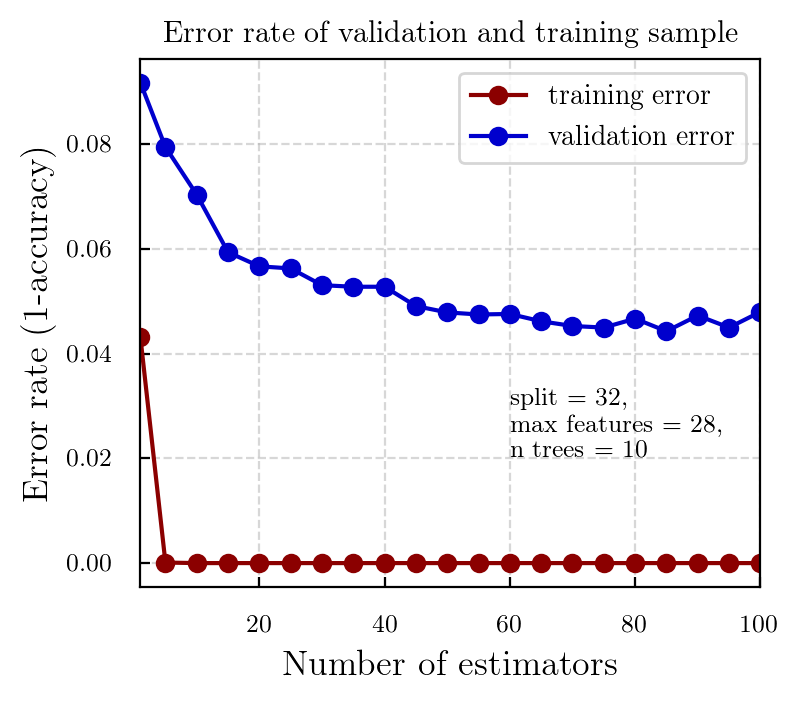

In [71]:
plt.figure(figsize=(4, 3.5))

plt.plot(estims, err_train, c = 'darkred', marker='o',label='training error')
plt.plot(estims, err_valid , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Number of estimators', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,100)

plt.text(60, 0.02, 'split = 32,\n max features = 28, \n n trees = 10')

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

We see that this improved a lot the performance (but made the code much slower).

Let's use the full sample to train and the test sample to predict. Now, in order to be fast, I will run it only only for 60 estimators in order to compare the error rate with the previous case.

In [72]:
n_estims = 60
        
clfb = RandomForestClassifier(n_estimators = 10, min_samples_split = 32,
                                    criterion="entropy", max_features=28)
        
ada_cl = AdaBoostClassifier(clfb, n_estimators=n_estims, algorithm='SAMME')
        
ada_cl.fit(data_train, np.ravel(labels_train))
        
y_pred_train = ada_cl.predict(data_train)
y_pred_test = ada_cl.predict(data_test)
        
error_training = 1.0 - accuracy_score(np.ravel(labels_train), y_pred_train)
error_test = 1.0 - accuracy_score(np.ravel(labels_test), y_pred_test)

In [73]:
print(error_test)

0.031399999999999983


The result now is slightly better, with an error rate of $\sim 3.1 \%$.